##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
!wget --no-check-certificate "https://storage.googleapis.com/kaggle-data-sets/9726%2F17999%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1595422334&Signature=OhoO0QO6FME8Muu4Mhz6p%2FzqHqL4y9nKlhaBoUcVbfOLfnVXv22aQq1q%2B4DIY2m1ov%2FaDVO8EVOwISOnSWiphzb1hyyOAE5FNnfpwdGDLCQ3WFcdlQywsKaS6UB%2B%2Bf8rBglnZXG05Vt3WiSQe4Yh4MlzrNjvxZGE1cqC4epqPbrUA4qKCDsFuJrO5v7cPLjEtB9%2FDF8NTEG%2B0kf633Y0tIEidsQSRR2pmYw1CIFNlqELl5amcBl6axpFWxwCG2F2LLKXSYqQYhegHOMNHZLKfydngMi20EIYEQY%2BRSNPVb6rxmj%2Blr66R%2F5XbuJZu71wDBLndHQd678BtI0dl%2F0bBw%3D%3D"

The name is too long, 487 chars total.
Trying to shorten...
New name is 9726%2F17999%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1595422334&Signature=OhoO0QO6FME8Muu4Mhz6p%2FzqHqL4y9nKlhaBoUcVbfOLfnVXv22aQq1q+4DIY2m1ov%2FaDVO8EVOwISOnSWiphzb1hyyOAE5FNnf.
--2020-07-19 12:52:37--  https://storage.googleapis.com/kaggle-data-sets/9726%2F17999%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1595422334&Signature=OhoO0QO6FME8Muu4Mhz6p%2FzqHqL4y9nKlhaBoUcVbfOLfnVXv22aQq1q%2B4DIY2m1ov%2FaDVO8EVOwISOnSWiphzb1hyyOAE5FNnfpwdGDLCQ3WFcdlQywsKaS6UB%2B%2Bf8rBglnZXG05Vt3WiSQe4Yh4MlzrNjvxZGE1cqC4epqPbrUA4qKCDsFuJrO5v7cPLjEtB9%2FDF8NTEG%2B0kf633Y0tIEidsQSRR2pmYw1CIFNlqELl5amcBl6axpFWxwCG2F2LLKXSYqQYhegHOMNHZLKfydngMi20EIYEQY%2BRSNPVb6rxmj%2Blr66R%2F5XbuJZu71wDBLndHQd678BtI0dl%2F0bBw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.202.128, 209.85.234.128, ...


In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 75kB/s 
     |████████████████████████████████| 3.8MB 47.7MB/s 
     |████████████████████████████████| 450kB 45.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8dfe80d25f5be9bf3c48fa997bfc918b898dba7e67d92d83b5825700bc063166
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: t

In [ ]:
import os
import zipfile
local_zip = '/content/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()



In [ ]:
import tensorflow
tensorflow.__version__

'2.0.0'

In [ ]:
import numpy as np
import pandas as pd

traindataset = pd.read_csv('/content/A_Z/A_Z.csv').astype('float32')

In [ ]:
traindataset.rename(columns={'0':'label'}, inplace=True)
X = traindataset.drop('label',axis = 1)
y = traindataset['label']
print(X.shape)
print(y.shape)

(372450, 784)
(372450,)


In [ ]:
from sklearn.model_selection import train_test_split
train_x, validation_x, train_y, validation_y = train_test_split(X, y)
train_y = np.array(train_y, dtype=int)
res = np.zeros((train_y.shape[0], 26), dtype=int)
res[np.arange(train_y.shape[0]), train_y] = 1
train_y = res

print('train_x ', train_x.shape)
print('train_y', train_y.shape)

validation_y = np.array(validation_y, dtype=int)
res = np.zeros((validation_y.shape[0], 26), dtype=int)
res[np.arange(validation_y.shape[0]), validation_y] = 1
validation_y = res

print('validation_x', validation_x.shape)
print('validation_y', validation_y.shape)

train_x  (279337, 784)
train_y (279337, 26)
validation_x (93113, 784)
validation_y (93113, 26)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


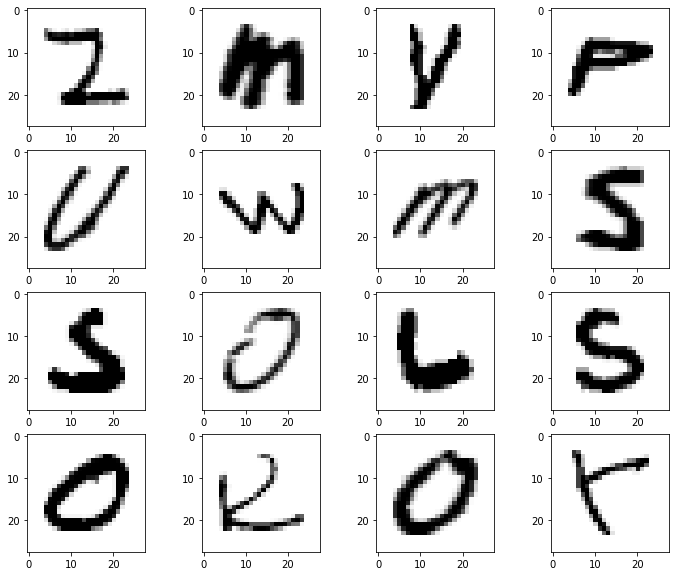

In [ ]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

X_shuffle = (train_x)
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
    print((train_y[i]))
plt.show()

In [ ]:
X = train_x
train_x =np.asarray(train_x).reshape([-1, 28, 28, 1])
validation_x =np.asarray(validation_x).reshape([-1, 28, 28, 1])
print('train_x', train_x.shape)
print('validation_x', validation_x.shape)

train_x (279337, 28, 28, 1)
validation_x (93113, 28, 28, 1)


In [ ]:
train_x = train_x[:279000]
train_y = train_y[:279000]
print("Training X size, ", train_x.shape)
print("Training Y size, ", train_y.shape)
print("Validation X size, ", validation_x.shape)
print("Validation Y size, ", validation_y.shape)



Training X size,  (279000, 28, 28, 1)
Training Y size,  (279000, 26)
Validation X size,  (93113, 28, 28, 1)
Validation Y size,  (93113, 26)


In [ ]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding="valid", input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')]
)
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [ ]:

"""
train_gen = ImageDataGenerator(1/255)
valid_gen = ImageDataGenerator(1/255)
valid_gen = ImageDataGenerator(rescale=1/255, rotation_range=40, zoom_range=0.2, fill_mode='nearest',
                               width_shift_range=0.2, height_shift_range=0.2)

train_gen = train_gen.flow(train_x, train_y)
valid_gen = valid_gen.flow(validation_x, validation_y)
train_gen.fit(train_x)
valid_gen.fit(validation_x)
"""
callbacks = tf.keras.callbacks.ModelCheckpoint('alphanetclassifier.h5')

history = model.fit(train_x/255, train_y, batch_size=1024,
          validation_data=(validation_x/255, validation_y),
          epochs=20, verbose=1, callbacks=[callbacks])


Train on 279000 samples, validate on 93113 samples
Epoch 1/20
279000/279000 [==============================] - 667s 2ms/sample - loss: 0.2211 - accuracy: 0.9388 - val_loss: 0.0935 - val_accuracy: 0.9750
Epoch 2/20
279000/279000 [==============================] - 667s 2ms/sample - loss: 0.0991 - accuracy: 0.9722 - val_loss: 0.0722 - val_accuracy: 0.9806
Epoch 3/20
279000/279000 [==============================] - 666s 2ms/sample - loss: 0.0744 - accuracy: 0.9792 - val_loss: 0.0584 - val_accuracy: 0.9837
Epoch 4/20
279000/279000 [==============================] - 665s 2ms/sample - loss: 0.0613 - accuracy: 0.9825 - val_loss: 0.0515 - val_accuracy: 0.9857
Epoch 5/20
279000/279000 [==============================] - 667s 2ms/sample - loss: 0.0513 - accuracy: 0.9850 - val_loss: 0.0435 - val_accuracy: 0.9881
Epoch 6/20
279000/279000 [==============================] - 668s 2ms/sample - loss: 0.0444 - accuracy: 0.9871 - val_loss: 0.0425 - val_accuracy: 0.9881
Epoch 7/20
279000/279000 [===========

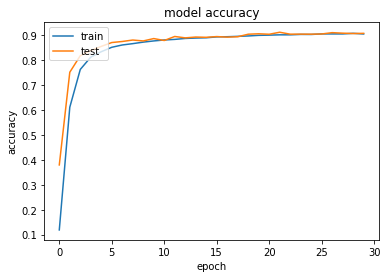

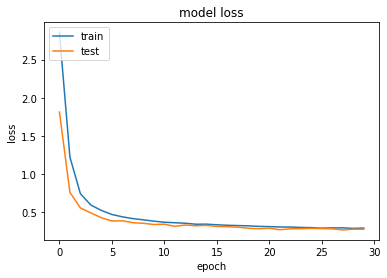

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow
tensorflow.__version__

'2.0.0'